In [14]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-29 00:10:41,918: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit_textbook.widgets import gate_demo
from qiskit.quantum_info import Statevector
import random
from qiskit import Aer

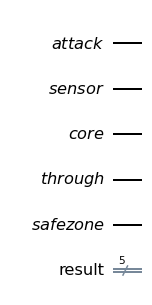

In [168]:
attack = QuantumRegister(1, name='attack')
sensor_shot = QuantumRegister(1, name= 'sensor')
Gundam_core = QuantumRegister(1, name = 'core')
Alice = QuantumRegister(1, name='through')
Bob = QuantumRegister(1, name='safezone')
#sensor_bit = QuantumRegister(1, name='sensor_check')
#Laser = ClassicalRegister(1, name="laser_power")
result=ClassicalRegister(5, name="result")
#attack_result = ClassicalRegister(1, name="attack_result")  
Gundam = QuantumCircuit(attack,sensor_shot,Gundam_core, Alice, Bob, result)
Gundam.draw()

In [82]:
'''
theta1 = random.uniform(0, (np.pi))
theta2 = random.uniform(0, (np.pi))
theta3 = random.uniform(0, (np.pi))
Gundam.u((theta1), (theta2), (theta3), 0)
Gundam.draw()

Traceback (most recent call last):
  File /opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py:105 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Input In [82]
    Gundam.draw()
                 
^
SyntaxError: EOF while scanning triple-quoted string literal

Use %tb to get the full traceback.


In [ ]:
'''
theta4 = random.uniform(0, (np.pi))
theta5 = random.uniform(0, (np.pi))
theta6 = random.uniform(0, (np.pi))
Gundam.u((theta4),(theta5), (theta6), 2)
Gundam.draw()

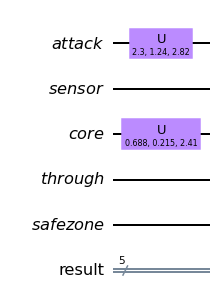

In [169]:
#theta4 = random.uniform(0, (np.pi))
#theta5 = random.uniform(0, (np.pi))
#theta6 = random.uniform(0, (np.pi))
Gundam.u(2.3, 1.24, 2.82, 0)
Gundam.u(0.688, 0.215, 2.41, 2)
Gundam.draw()

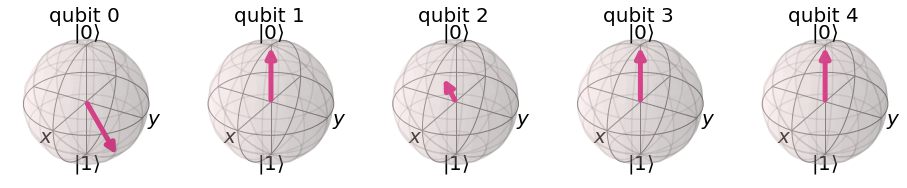

In [170]:
from qiskit.quantum_info import Statevector
vec = Statevector.from_instruction(Gundam)

plot_bloch_multivector(vec)

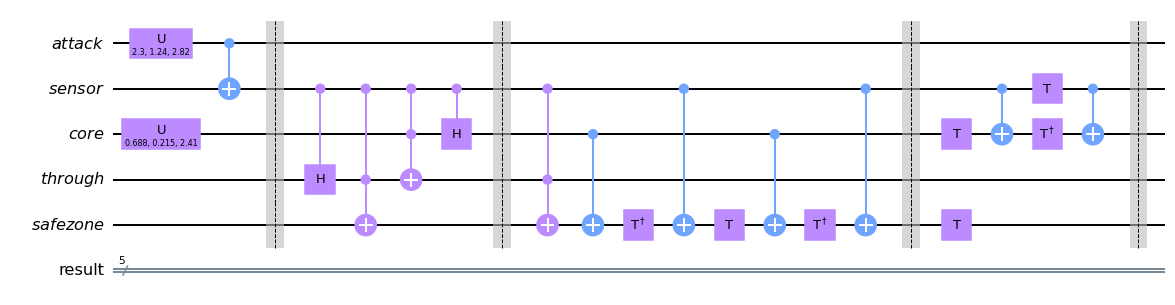

In [171]:
#Laser = np.random.rand()
#print(Laser)
#Gundam.h(0)
#Gundam.x(0)
Gundam.cx(0,1)
#Gundam.cx(1,2)
#Gundam.x(2)
#Gundam.measure(5,0)
Gundam.barrier()
Gundam.ch(1,3)
Gundam.ccx(1,3,4)
Gundam.ccx(1,2,3)
Gundam.ch(1,2)
Gundam.barrier()
#Gundam.measure(1,2)
#Gundam.cx(0,1)
Gundam.ccx(1,3,4)
Gundam.cx(2,4)
Gundam.tdg(4)
Gundam.cx(1,4)
Gundam.t(4)
Gundam.cx(2,4)
Gundam.tdg(4)
Gundam.cx(1,4)
Gundam.barrier()
Gundam.t(4)
Gundam.t(2)
Gundam.cx(1,2)
Gundam.t(1)
Gundam.tdg(2)
Gundam.cx(1,2)
#Gundam.measure(2,1)
#Gundam.measure(3,2)
Gundam.barrier()
Gundam.draw()
#else:
    #Gundam.measure(1,0)
    #Gundam.draw()

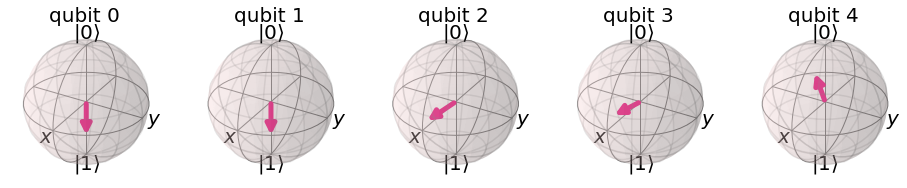

In [172]:
vec = Statevector.from_instruction(Gundam)

plot_bloch_multivector(vec)

In [173]:
Gundam.measure(0,0)
Gundam.measure(1,1)
Gundam.measure(2,2)
Gundam.measure(3,3)
Gundam.measure(4,4)

In [174]:
provider = IBMQ.get_provider(hub='ibm-q-skku', group='skku', project='skku-students')

In [175]:
provider.backends()
backend = provider.get_backend('ibmq_kolkata')
backend
from qiskit import execute
transpiled_gundam = transpile(Gundam, backend, optimization_level = 2)
job = execute(transpiled_gundam,backend,shots = 10000)

counts = job.result().get_counts()

# results = []
# results.append(execute(Gundam, backend).result())
# plot_histogram(results[0].get_counts())

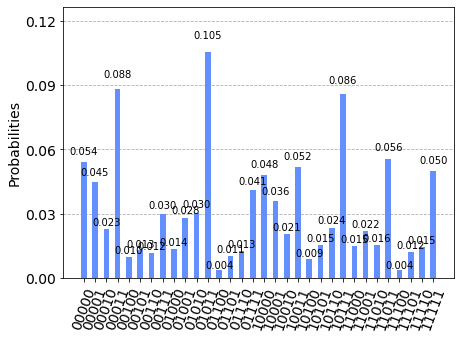

In [176]:
plot_histogram(counts)

Traceback (most recent call last):
  Input In [33] in <cell line: 3>
    results.append(execute(Gundam, backend).result())
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:279 in result
    raise IBMQJobInvalidStateError('Unable to retrieve result for job {}. '
IBMQJobInvalidStateError: 'Unable to retrieve result for job 62bb9c74d8901d64004ba794. Job was cancelled.'

Use %tb to get the full traceback.


In [ ]:
t_qc = transpile(Gundam, backend)
t_qc.save_statevector()
counts = aer_sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(5)]
plot_histogram(qubit_counts)

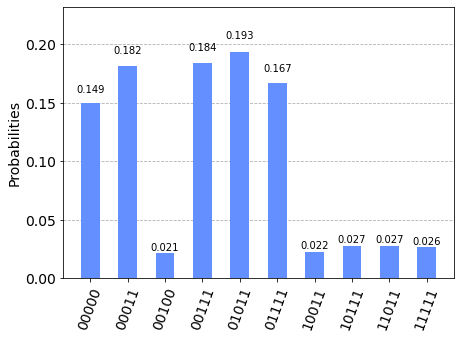

In [27]:
aer_sim = Aer.get_backend('aer_simulator')
from qiskit import execute
job = execute(Gundam, aer_sim, shots = 10000)
counts = job.result().get_counts()
results = []
results.append(execute(Gundam, aer_sim).result())
plot_histogram(results[0].get_counts())

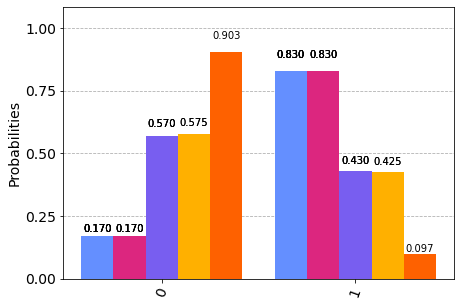

In [28]:
t_qc = transpile(Gundam, aer_sim)
t_qc.save_statevector()
counts = aer_sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(5)]
plot_histogram(qubit_counts)